# Importando Ferramentas

In [1]:
# Importando Ferramentas
import json

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
from scipy import stats

from Utils.data_utils import *

# Início das análises 

## Análise dos IDHs 

**Base utilizada: [Atlas do Desenvolvimento Humano (ADH)](https://basedosdados.org/dataset/mundo-onu-adh)**

O Atlas do Desenvolvimento Humano no Brasil é um site que traz o Índice de Desenvolvimento Humano Municipal (IDHm) e outros 200 indicadores de demografia, educação, renda, trabalho, habitação e vulnerabilidade para os municípios brasileiros. Contém as colunas idhm (IDH do município), idhm_e (índice educacional), idhm_l (índice de longevidade) e idhm_r (índice de renda).


In [2]:
idh_municipios = get_data("mundo_onu_adh.municipios")

idh_municipios.sort_values(by=["id_municipio", "ano"]).head()


,id_municipio,ano,expectativa_vida,fecundidade_total,mortalidade_1,mortalidade_5,razao_dependencia,prob_sobrevivencia_40,prob_sobrevivencia_60,taxa_envelhecimento,...,pia,pia_10_14,pia_15_17,pia_18_mais,indice_escolaridade,indice_frequencia_escolar,idhm,idhm_e,idhm_l,idhm_r
0,1100015,1991,62.01,4.08,45.58,58.05,73.50,83.81,66.87,1.82,...,NaN,NaN,NaN,NaN,0.117,0.109,0.329,0.112,0.617,0.516
5565,1100015,2000,66.90,3.11,28.36,33.96,61.65,89.61,75.40,3.35,...,20346.0,3040.0,1830.0,15476.0,0.195,0.303,0.483,0.262,0.698,0.617
11130,1100015,2010,70.75,2.24,23.80,25.49,47.37,94.50,83.18,5.84,...,20434.0,2401.0,1602.0,16431.0,0.368,0.629,0.641,0.526,0.763,0.657
1,1100023,1991,66.02,3.72,32.39,41.41,69.97,88.08,74.23,1.82,...,NaN,NaN,NaN,NaN,0.200,0.199,0.432,0.199,0.684,0.593
5566,1100023,2000,69.52,2.77,21.68,25.99,59.88,91.91,80.15,2.92,...,57064.0,8285.0,5190.0,43589.0,0.314,0.358,0.556,0.343,0.742,0.674


In [3]:
df_idh_municipios = idh_municipios[["id_municipio", "ano", "idhm", "idhm_e", "idhm_l", "idhm_r"]]#.drop_duplicates(subset=["id_municipio"])

df_idh_municipios.head()

,id_municipio,ano,idhm,idhm_e,idhm_l,idhm_r
0,1100015,1991,0.329,0.112,0.617,0.516
1,1100023,1991,0.432,0.199,0.684,0.593
2,1100031,1991,0.309,0.108,0.636,0.430
3,1100049,1991,0.407,0.171,0.667,0.593
4,1100056,1991,0.386,0.167,0.629,0.547


**Dicionário de Dados**

<br>

- idhm    :  `Municipal`
- idhm_e  :  `Educação`
- idhm_l  :  `Longevidade`
- idhm_r  :  `Renda` 

## Informações dos municípios

**Base utilizada: [Diretórios Brasileiros](https://basedosdados.org/dataset/br-bd-diretorios-brasil)**

Tabelas ligando diversos códigos institucionais e informações de entidades brasileiras.

In [4]:
info_municipios = get_data("br_bd_diretorios_brasil.municipio")

df_info_municipios = info_municipios[["id_municipio", 
                                      "municipio", 
                                      "capital_uf", 
                                      "uf", 
                                      "regiao", 
                                      "microrregiao", 
                                      "mesorregiao"]]

In [5]:
df_info_municipios.head(5)

,id_municipio,municipio,capital_uf,uf,regiao,microrregiao,mesorregiao
0,1100023,Ariquemes,0,Rondônia,Norte,Ariquemes,Leste Rondoniense
1,1100106,Guajará-Mirim,0,Rondônia,Norte,Guajará-Mirim,Madeira-Guaporé
2,1100114,Jaru,0,Rondônia,Norte,Ji-Paraná,Leste Rondoniense
3,1100130,Machadinho D'Oeste,0,Rondônia,Norte,Ariquemes,Leste Rondoniense
4,1100205,Porto Velho,1,Rondônia,Norte,Porto Velho,Madeira-Guaporé


In [6]:
# Juntando as duas tabelas com base no ID municipal

df_total_municipios = df_idh_municipios.merge(df_info_municipios, left_on="id_municipio", right_on="id_municipio")
df_total_municipios.head()

,id_municipio,ano,idhm,idhm_e,idhm_l,idhm_r,municipio,capital_uf,uf,regiao,microrregiao,mesorregiao
0,1100015,1991,0.329,0.112,0.617,0.516,Alta Floresta D'Oeste,0,Rondônia,Norte,Cacoal,Leste Rondoniense
1,1100015,2000,0.483,0.262,0.698,0.617,Alta Floresta D'Oeste,0,Rondônia,Norte,Cacoal,Leste Rondoniense
2,1100015,2010,0.641,0.526,0.763,0.657,Alta Floresta D'Oeste,0,Rondônia,Norte,Cacoal,Leste Rondoniense
3,1100023,1991,0.432,0.199,0.684,0.593,Ariquemes,0,Rondônia,Norte,Ariquemes,Leste Rondoniense
4,1100023,2000,0.556,0.343,0.742,0.674,Ariquemes,0,Rondônia,Norte,Ariquemes,Leste Rondoniense


In [7]:
for ano in [1991, 2000, 2010]:

    regiao = "Norte"
    media = round(df_total_municipios.loc[(df_total_municipios["ano"]==ano) & (
                                          df_total_municipios["regiao"]=="Norte")]["idhm_e"].mean(),2)
    
    std = round(df_total_municipios.loc[(df_total_municipios["ano"]==ano) & (
                                          df_total_municipios["regiao"]=="Norte")]["idhm_e"].std(),2)
  

#     print("Ano: {} | Regiao: {}  |  Média: {}".format(ano, regiao, media))
#     print("Ano: {} | Regiao: {}  |  Std: {}".format(ano, regiao, std))

### <center>Tabela de dados estatísticos do IDHM educacional da Região Norte 
    
||1991|2000|2010|
|:---:|:---:|:---:|:---:|
|Desvio Padrão|0.06|0.09|0.09|
|Média |0.11|0.25|0.49|

In [8]:
for ano in [1991, 2000, 2010]:

    regiao = "Sudeste"
    
    media = round(df_total_municipios.loc[(df_total_municipios["ano"]==ano) & (
                                          df_total_municipios["regiao"]==regiao)]["idhm_e"].mean(),2)
    
    std = round(df_total_municipios.loc[(df_total_municipios["ano"]==ano) & (
                                          df_total_municipios["regiao"]==regiao)]["idhm_e"].std(),2)
    

#     print("Ano: {} | Regiao: {}  |  Média: {}".format(ano, regiao, media))
#     print("Ano: {} | Regiao: {}  |  Std: {}".format(ano, regiao, std))

### <center>Tabela de dados estatísticos do IDHM educacional da Região Sudeste 

||1991|2000|2010|
|:---:|:---:|:---:|:---:|
|Desvio Padrão|0.09|0.10|0.08|
|Média |0.22|0.43|0.61|

## Variação bruta dos índices de IDHM e IDHM educacional

In [9]:
evolucao_idh_municipio = { "id_municipio": list(df_total_municipios["id_municipio"].unique()), "idhm": [], "idhm_e":[]}

lista_var_percent_idhm = []
lista_var_percent_idhm_e = []

for id_municipio in df_total_municipios["id_municipio"].unique():
    
    df_var_idhm = df_total_municipios.loc[df_total_municipios["id_municipio"] == id_municipio, "idhm"].values
    df_var_idhm_e = df_total_municipios.loc[df_total_municipios["id_municipio"] == id_municipio, "idhm_e"].values
    
    var_percent_idhm = df_var_idhm[2]-df_var_idhm[1]   
    var_percent_idhm_e = df_var_idhm_e[2]-df_var_idhm_e[1]
    
    lista_var_percent_idhm.append(var_percent_idhm)  
    lista_var_percent_idhm_e.append(var_percent_idhm_e)
    
evolucao_idh_municipio["idhm"] = lista_var_percent_idhm    
evolucao_idh_municipio["idhm_e"] = lista_var_percent_idhm_e 

In [10]:
df_evolucao_idh = pd.DataFrame.from_dict(evolucao_idh_municipio)

df_evolucao_idh.sort_values(by="idhm").head(5)

,id_municipio,idhm,idhm_e
3319,3504701,0.030,0.015
3499,3520426,0.031,0.066
3389,3510807,0.031,0.059
5026,4320305,0.036,0.099
3772,3545159,0.040,0.085


## Melhores e piores IDHs

In [11]:
sorted_evolucao_idh = df_evolucao_idh.sort_values(by='idhm').reset_index(drop=True)

In [12]:
MUN_IDS = get_mun_ids()
MUN_IDS.head(5)

,municipio,microrregiao,mesorregiao,sigla_uf,uf,regiao
id_municipio,,,,,,
1100080,Costa Marques,Guajará-Mirim,Madeira-Guaporé,RO,Rondônia,Norte
1100106,Guajará-Mirim,Guajará-Mirim,Madeira-Guaporé,RO,Rondônia,Norte
1100205,Porto Velho,Porto Velho,Madeira-Guaporé,RO,Rondônia,Norte
1100338,Nova Mamoré,Porto Velho,Madeira-Guaporé,RO,Rondônia,Norte
1100452,Buritis,Porto Velho,Madeira-Guaporé,RO,Rondônia,Norte


In [13]:
def get_mun_name_by_id(row):
    mun_info = MUN_IDS.loc[row["id_municipio"]]
    row["municipio"] = mun_info["municipio"]
    row["sigla_uf"] = mun_info["sigla_uf"]
    row["regiao"] = mun_info["regiao"]
    return row
    

sorted_evolucao_idh = sorted_evolucao_idh.apply(lambda row: get_mun_name_by_id(row), axis=1)

In [14]:
# query_despesas = \
# """
# SELECT  id_municipio, sigla_uf, ano, coluna, conta, valor
# FROM `basedosdados.br_tesouro_finbra.despesas_por_funcao` 
# WHERE coluna='Despesas Pagas' AND conta IN 
# ('Educação',
# 'Ensino Fundamental',
# 'Atenção Básica',
# 'Assistência à Criança e ao Adolescente',
# 'Educação Infantil',
# 'Educação de Jovens e Adultos',
# 'Educação Especial',
# 'Cultura',
# '"Patrimônio Histórico, Artístico e Arqueológico"',
# 'Difusão Cultural',
# 'Ensino Superior',
# 'Ensino Médio',
# 'Ensino Profissional',
# 'Educação Básica',
# 'Ciência e Tecnologia',
# 'Desenvolvimento Tecnológico e Engenharia',
# 'Demais Subfunções Ciência e Tecnologia',
# 'Demais Subfunções Cultura');
# """

query_despesas = \
"""
SELECT  id_municipio, sigla_uf, ano, coluna, conta, valor
FROM `basedosdados.br_tesouro_finbra.despesas_por_funcao` 
WHERE coluna='Despesas Pagas' AND conta IN 
('Educação',
'Ensino Fundamental',
'Educação Infantil',
'Educação de Jovens e Adultos',
'Ensino Médio',
'Educação Básica');
"""


df_despesas = get_data("br_tesouro_finbra.despesas_por_funcao.educacao", query = query_despesas)

In [15]:
df_despesas.head(5)

,id_municipio,sigla_uf,ano,coluna,conta,valor
0,1100015,RO,2019,Despesas Pagas,Atenção Básica,16711374.57
1,1100015,RO,2019,Despesas Pagas,Educação,19035814.40
2,1100015,RO,2019,Despesas Pagas,Ensino Fundamental,19035814.40
3,1100023,RO,2019,Despesas Pagas,Assistência à Criança e ao Adolescente,485594.57
4,1100023,RO,2019,Despesas Pagas,Atenção Básica,15434353.83


## Correção dos valores baseados no índice IGP-M 

Para comparar os valores investidos em diferentes anos, optamos por fazer correções baseadas no índice IGP-M (Índice Geral de Preços – Mercado). A fim de encontrar esses coeficientes correção, utilizamos a [calculadora disponibilizada pelo Banco Central](https://www3.bcb.gov.br/CALCIDADAO/publico/exibirFormCorrecaoValores.do?method=exibirFormCorrecaoValores).  


In [16]:
with open("./Utils/moedas_2019.json", mode="r") as f:
    MOEDAS_2019 = json.load(f)

def correcao_monetaria(row):
    row["valor"] *= MOEDAS_2019[str(row["ano"])]
    return row

corrigido_df_despesas = df_despesas.apply(lambda row: correcao_monetaria(row), axis=1)

In [17]:
query_ideb = "SELECT id_municipio, municipio, estado_abrev AS sigla_uf, ano, rede, ensino, ideb FROM `basedosdados.br_inep_ideb.municipio`;"

df_ideb_mun = get_data("br_inep_ideb.municipio.reduzido", query = query_ideb)

df_ideb_mun = df_ideb_mun.loc[((df_ideb_mun["ensino"]=="fundamental") &  
             (df_ideb_mun["rede"]=="municipal") & 
             (df_ideb_mun["ano"]<2021)) &~
             (pd.isna(df_ideb_mun["ideb"]))].reset_index(drop=True)

df_ideb_mun.sample(5).head(5)

,id_municipio,municipio,sigla_uf,ano,rede,ensino,ideb
1170,1302405,Lábrea,AM,2007,municipal,fundamental,3.0
31426,2933000,Valente,BA,2009,municipal,fundamental,4.4
48976,4102901,Bituruna,PR,2013,municipal,fundamental,5.5
45197,3526001,Junqueirópolis,SP,2005,municipal,fundamental,5.6
34968,3132909,Itamogi,MG,2011,municipal,fundamental,6.3


Despesas apenas com o Ensino Fundamental. Esse filtro foi feito a fim de explorar correlações com a base do Ideb.

In [18]:
despesas_fundamental = corrigido_df_despesas.loc[(corrigido_df_despesas["conta"]=="Ensino Fundamental") & 
                                                 (corrigido_df_despesas["ano"].isin([2013,2017]))].sort_values(by=["id_municipio", "ano"]).dropna().reset_index(drop=True)

despesas_fundamental.sample(5).head()

,id_municipio,sigla_uf,ano,coluna,conta,valor
2051,2402204,RN,2017,Despesas Pagas,Ensino Fundamental,2.641887e+07
6203,3501608,SP,2013,Despesas Pagas,Ensino Fundamental,5.029156e+07
1055,2107308,MA,2013,Despesas Pagas,Ensino Fundamental,4.751304e+06
3842,2919157,BA,2013,Despesas Pagas,Ensino Fundamental,2.643313e+07
4683,3123205,MG,2013,Despesas Pagas,Ensino Fundamental,6.046275e+06


In [19]:
populacao_mun = get_data("br_ibge_populacao.municipios")
populacao_mun = populacao_mun.loc[populacao_mun["ano"].isin([2013,2017])].sort_values(by=["id_municipio", "ano"]).reset_index(drop=True)
populacao_mun

,id_municipio,ano,populacao
0,1100015,2013,25728.0
1,1100015,2017,25437.0
2,1100023,2013,101269.0
3,1100023,2017,107345.0
4,1100031,2013,6495.0
...,...,...,...
11135,5222203,2017,5731.0
11136,5222302,2013,5460.0
11137,5222302,2017,5690.0
11138,5300108,2013,2789761.0


In [20]:
def format_tabela_despesas_ideb(ideb, despesas, populacao):
    tabela_despesas_ideb = pd.DataFrame(columns=["id_municipio", 
                                          "municipio", 
                                          "sigla_uf",
                                          "regiao",
                                          "populacao_2013",
                                          "populacao_2017",
                                          "populacao_diff",
                                          "rede", 
                                          "ensino", 
                                          "ideb_2013", 
                                          "ideb_2019", 
                                          "ideb_diff", 
                                          "valor_2013", 
                                          "valor_2017", 
                                          "valor_diff", 
                                          "coeficiente_efetividade", ])
    for id in list(MUN_IDS.index):
        mun_ideb = ideb.loc[ideb["id_municipio"]==id]
        mun_despesas = despesas.loc[despesas["id_municipio"]==id]
        mun_populacao = populacao.loc[populacao["id_municipio"]==id]

        if len(mun_ideb) == 0 or len(mun_despesas) == 0 or len(mun_populacao) == 0: continue

        try:
            mun_populacao_2013 = int(max(list(mun_populacao.loc[mun_populacao["ano"]==2013]["populacao"])))
        except ValueError:
            mun_populacao_2013 = float("NaN")
        try:
            mun_populacao_2017 = int(max(list(mun_populacao.loc[mun_populacao["ano"]==2017]["populacao"])))
        except ValueError:
            mun_populacao_2017 = float("NaN")

        try:
            mun_ideb_2013 = max(list(mun_ideb.loc[mun_ideb["ano"]==2013]["ideb"]))
        except ValueError:
            mun_ideb_2013 = float("NaN")
        try:
            mun_ideb_2019 = max(list(mun_ideb.loc[mun_ideb["ano"]==2019]["ideb"]))
        except ValueError:
            mun_ideb_2019 = float("NaN")

        try:
            mun_despesas_2013 = round(max(list(mun_despesas.loc[mun_despesas["ano"]==2013]["valor"]))/mun_populacao_2013, 2)
        except ValueError:
            mun_despesas_2013 = float("NaN")
        try:
            mun_despesas_2017 = round(max(list(mun_despesas.loc[mun_despesas["ano"]==2017]["valor"]))/mun_populacao_2017, 2)
        except ValueError:
            mun_despesas_2017 = float("NaN")

        try:
            coef = round((mun_ideb_2019 - mun_ideb_2013)/(mun_despesas_2017 - mun_despesas_2013),8)
        except:
            coef = float("NaN")

        tabela_despesas_ideb = tabela_despesas_ideb.append({
            "id_municipio": id,
            "municipio": mun_ideb.iloc[0]["municipio"],
            "sigla_uf": mun_ideb["sigla_uf"].iloc[0],
            "regiao": MUN_IDS.loc[id]["regiao"],
            "rede": mun_ideb["rede"].iloc[0],
            "ensino": mun_ideb["ensino"].iloc[0],
            "populacao_2013": mun_populacao_2013,
            "populacao_2017": mun_populacao_2017,
            "populacao_diff": mun_populacao_2017 - mun_populacao_2013,
            "ideb_2013": mun_ideb_2013,
            "ideb_2019": mun_ideb_2019,
            "ideb_diff": mun_ideb_2019 - mun_ideb_2013,
            "valor_2013": mun_despesas_2013,
            "valor_2017": mun_despesas_2017,
            "valor_diff": mun_despesas_2017 - mun_despesas_2013,
            "coeficiente_efetividade": coef
        }, ignore_index=True)
    return tabela_despesas_ideb


tabela_despesas_ideb = format_tabela_despesas_ideb(df_ideb_mun, despesas_fundamental, populacao_mun)

In [21]:
tabela_despesas_ideb.sort_values("ideb_diff", ascending=False).head(10)

,id_municipio,municipio,sigla_uf,regiao,populacao_2013,populacao_2017,populacao_diff,rede,ensino,ideb_2013,ideb_2019,ideb_diff,valor_2013,valor_2017,valor_diff,coeficiente_efetividade
1724,2708105,Santana do Mundaú,AL,Nordeste,11134,10899,-235,municipal,fundamental,3.3,7.5,4.2,682.15,401.86,-280.29,-0.014984
5064,4316501,Salvador do Sul,RS,Sul,7182,7434,252,municipal,fundamental,2.9,7.1,4.2,559.52,586.90,27.38,0.153397
1778,2306603,Itatira,CE,Nordeste,19861,20675,814,municipal,fundamental,3.9,7.8,3.9,1020.91,1289.18,268.27,0.014538
1696,2702306,Coruripe,AL,Nordeste,55648,57498,1850,municipal,fundamental,5.1,8.9,3.8,876.93,859.11,-17.82,-0.213244
313,2704609,Maravilha,AL,Nordeste,10168,9418,-750,municipal,fundamental,1.9,5.7,3.8,1155.91,1246.81,90.90,0.041804
3814,2609105,Machados,PE,Nordeste,14770,15820,1050,municipal,fundamental,3.3,7.1,3.8,522.54,510.53,-12.01,-0.316403
3453,2201903,Bom Jesus,PI,Nordeste,23826,24711,885,municipal,fundamental,3.8,7.5,3.7,738.33,833.53,95.20,0.038866
3150,2313906,Uruoca,CE,Nordeste,13348,13677,329,municipal,fundamental,4.7,8.3,3.6,800.85,707.79,-93.06,-0.038685
3385,2207009,Oeiras,PI,Nordeste,36195,36432,237,municipal,fundamental,4.0,7.4,3.4,722.46,765.92,43.46,0.078233
3113,2303659,Catunda,CE,Nordeste,10218,10365,147,municipal,fundamental,4.8,8.2,3.4,1022.45,1029.20,6.75,0.503704


# Investimento em educação por pessoa

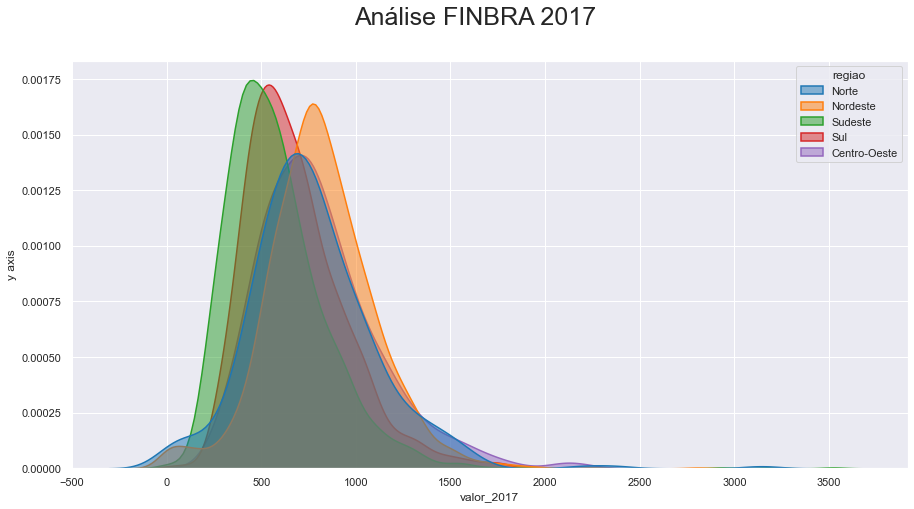

In [22]:
sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(figsize = (15,7.5))

ax = sns.kdeplot(data = tabela_despesas_ideb, 
                  x= "valor_2017",
                  hue = 'regiao',
                  palette = "tab10",
                  fill = True, 
                  common_norm = False, 
                  alpha = .5, 
                  linewidth = 1.5)

fig.suptitle('Análise FINBRA 2017', fontsize=25)

ax.yaxis.set_label_text('y axis')

plt.savefig("./Imagens/analise_finbra_2017.png", dpi=400)


In [23]:
tabela_despesas_ideb

,id_municipio,municipio,sigla_uf,regiao,populacao_2013,populacao_2017,populacao_diff,rede,ensino,ideb_2013,ideb_2019,ideb_diff,valor_2013,valor_2017,valor_diff,coeficiente_efetividade
0,1100080,Costa Marques,RO,Norte,15853,17400,1547,municipal,fundamental,5.4,4.9,-0.5,NaN,571.46,NaN,NaN
1,1100106,Guajará-Mirim,RO,Norte,45761,47451,1690,municipal,fundamental,4.8,5.0,0.2,387.61,357.77,-29.84,-0.006702
2,1100205,Porto Velho,RO,Norte,484992,519436,34444,municipal,fundamental,4.4,5.3,0.9,482.12,349.89,-132.23,-0.006806
3,1100338,Nova Mamoré,RO,Norte,26227,28891,2664,municipal,fundamental,4.9,4.8,-0.1,529.07,635.54,106.47,-0.000939
4,1100452,Buritis,RO,Norte,36555,39044,2489,municipal,fundamental,5.4,5.5,0.1,625.58,670.79,45.21,0.002212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5369,3169604,Tupaciguara,MG,Sudeste,25171,25538,367,municipal,fundamental,6.0,6.2,0.2,528.17,769.49,241.32,0.000829
5370,3170107,Uberaba,MG,Sudeste,315360,328272,12912,municipal,fundamental,5.6,6.0,0.4,270.91,314.20,43.29,0.009240
5371,3170206,Uberlândia,MG,Sudeste,646673,676613,29940,municipal,fundamental,5.7,6.0,0.3,304.31,293.46,-10.85,-0.027650
5372,3170438,União de Minas,MG,Sudeste,4498,4452,-46,municipal,fundamental,5.4,5.9,0.5,755.01,540.48,-214.53,-0.002331


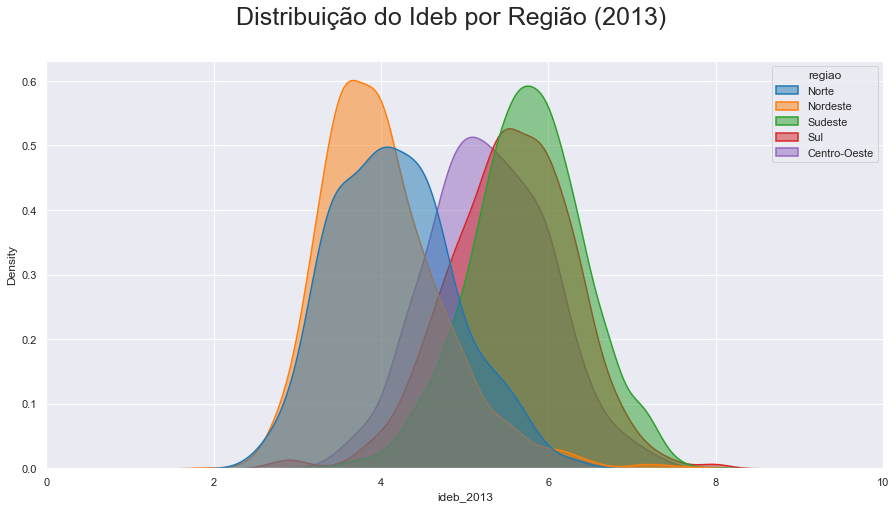

In [24]:
sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(figsize = (15,7.5))

ax = sns.kdeplot(data = tabela_despesas_ideb, 
                  x= "ideb_2013",
                  hue = 'regiao',
                  palette = "tab10",
                  fill = True, 
                  common_norm = False, 
                  alpha = .5, 
                  linewidth = 1.5)


ax.set_xlim(0, 10)



fig.suptitle('Distribuição do Ideb por Região (2013)', fontsize=25)


plt.savefig("./Imagens/dist_ideb_regiao_2013.png", dpi=400)

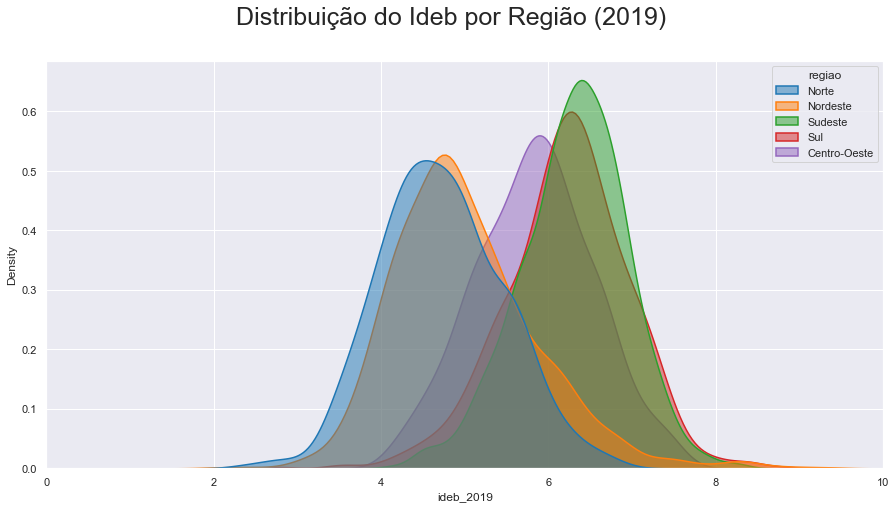

In [25]:
sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(figsize = (15,7.5))

ax = sns.kdeplot(data = tabela_despesas_ideb, 
                  x= "ideb_2019",
                  hue = 'regiao',
                  palette = "tab10",
                  fill = True, 
                  common_norm = False, 
                  alpha = .5, 
                  linewidth = 1.5)


ax.set_xlim(0, 10)



fig.suptitle('Distribuição do Ideb por Região (2019)', fontsize=25)


plt.savefig("./Imagens/dist_ideb_regiao_2019.png", dpi=400)

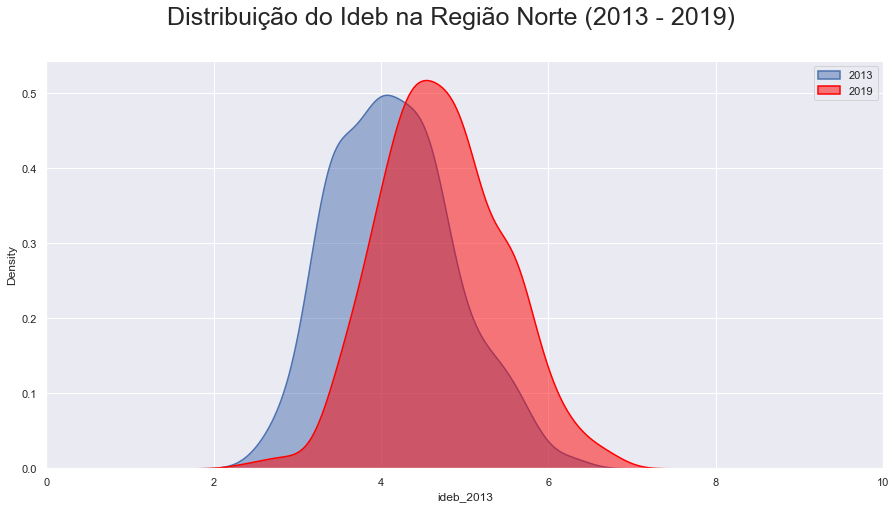

In [26]:
sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(figsize = (15,7.5))

ax = sns.kdeplot(data = tabela_despesas_ideb.loc[tabela_despesas_ideb["regiao"]=="Norte"], 
                  x= "ideb_2013",
                  palette = "tab10",
                  fill = True, 
                  common_norm = False, 
                  alpha = .5, 
                  linewidth = 1.5, 
                 legend="2013")

ax = sns.kdeplot(data = tabela_despesas_ideb.loc[tabela_despesas_ideb["regiao"]=="Norte"], 
                  x= "ideb_2019",
                  color = 'red',
                  palette = "tab10",
                  fill = True, 
                  common_norm = False, 
                  alpha = .5, 
                  linewidth = 1.5, legend="2019")


# ax0.legend(['A simple line'])
ax.legend(["2013","2019"])


ax.set_xlim(0, 10)
ax.set_xlim(0, 10)


fig.suptitle('Distribuição do Ideb na Região Norte (2013 - 2019)', fontsize=25)


plt.savefig("./Imagens/dist_ideb_norte_2013_2019.png", dpi=400)

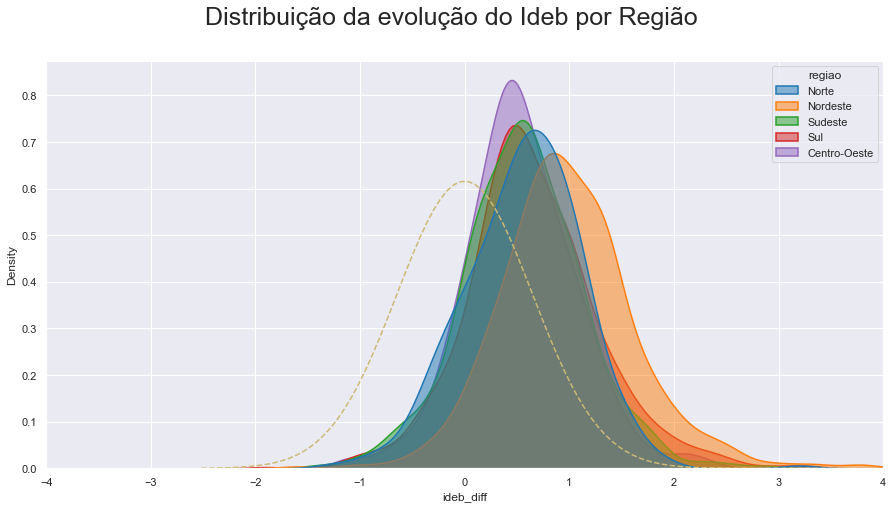

In [58]:
sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(figsize = (15,7.5))

ax = sns.kdeplot(data = tabela_despesas_ideb, 
                  x= "ideb_diff",
                  hue = 'regiao',
                  palette = "tab10",
                  fill = True, 
                  common_norm = False, 
                  alpha = .5, 
                  linewidth = 1.5)


media = tabela_despesas_ideb["ideb_diff"].mean()
dp =  tabela_despesas_ideb["ideb_diff"].std()

x_ = np.linspace(media - 5*dp, media + 5*dp, 100)


plt.plot(x_, 
         stats.norm.pdf(x_, 0, dp),
         '--',
         c='y')
ax.set_xlim(-4, 4)



fig.suptitle('Distribuição da evolução do Ideb por Região', fontsize=25)


plt.savefig("./Imagens/dist_evolucao_ideb_regiao.png", dpi=400)

#plt.show()

# ax.plot(x_,
#         lista_medias_municipio, 
#         marker='o', 
#         label='Média')



# ax.axvline(x=tabela_despesas_ideb["ideb_diff"].mean(),linewidth=2, color='r')

#fig.show()

In [59]:
print("IDEB Brasil Médio >>", tabela_despesas_ideb["ideb_diff"].mean())

IDEB Brasil Médio >> 0.7186337914308811


In [28]:
for regiao in tabela_despesas_ideb["regiao"].unique():
    

    media = round(tabela_despesas_ideb.loc[tabela_despesas_ideb["regiao"]==regiao]["ideb_diff"].mean(),2)
    
    print("Regiao: {}  |  Média: {}".format(regiao, media))

Regiao: Norte  |  Média: 0.56
Regiao: Nordeste  |  Média: 0.98
Regiao: Sudeste  |  Média: 0.55
Regiao: Sul  |  Média: 0.65
Regiao: Centro-Oeste  |  Média: 0.53


In [29]:
for regiao in tabela_despesas_ideb["regiao"].unique():
    

    std = round(tabela_despesas_ideb.loc[tabela_despesas_ideb["regiao"]==regiao]["ideb_diff"].std(),2)
    
    print("Regiao: {}  |  Std: {}".format(regiao, std))

Regiao: Norte  |  Std: 0.56
Regiao: Nordeste  |  Std: 0.66
Regiao: Sudeste  |  Std: 0.59
Regiao: Sul  |  Std: 0.64
Regiao: Centro-Oeste  |  Std: 0.53


In [30]:
media = round(tabela_despesas_ideb["ideb_diff"].mean(),2)
std = round(tabela_despesas_ideb["ideb_diff"].std(),2)

print("Regiao: {}  |  Média: {}".format("Brasil", media))
print("Regiao: {}  |  Std: {}".format("Brasil", std))

Regiao: Brasil  |  Média: 0.72
Regiao: Brasil  |  Std: 0.65




||Brasil|Norte|Nordeste|Sul|Sudeste|Centro-Oeste|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|Desvio Padrão |0.65|0.56|0.66|0.64|0.59|0.53|
|Média |0.72|0.56|0.98|0.65|0.55|0.53|

In [31]:
# sns.set_theme(style="darkgrid")

# fig, ax = plt.subplots(figsize = (15,7.5))

# ax = sns.kdeplot(data = tabela_despesas_ideb, 
#                   x= "ideb_diff",
#                   hue = 'regiao',
#                   palette = "tab10",
#                   fill = True, 
#                   common_norm = False, 
#                   alpha = .5, 
#                   linewidth = 1.5)
# ax.set_xlim(-4, 4)

# fig.suptitle('Distribuição da evolução do IDEB por Região', fontsize=25)


# plt.savefig("./Imagens/dist_ideb_regiao.png")



(-4.0, 4.0)

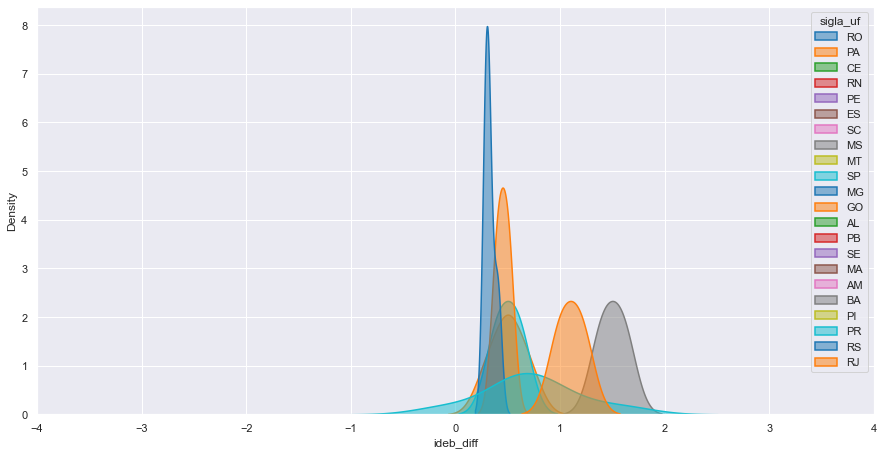

In [32]:
sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(figsize = (15,7.5))

ax = sns.kdeplot(data = tabela_despesas_ideb.loc[tabela_despesas_ideb["populacao_2017"]>=500000,:], 
                  x= "ideb_diff",
                  hue = 'sigla_uf',
                  palette = "tab10",
                  fill = True, 
                  common_norm = False, 
                  alpha = .5, 
                  linewidth = 1.5)
ax.set_xlim(-4, 4)


In [33]:
fig = px.scatter(tabela_despesas_ideb, x="valor_diff", y="ideb_diff", color="regiao", hover_data=['municipio'])
fig.show()

In [34]:
tabela_despesas_ideb_sorted = tabela_despesas_ideb.dropna().sort_values("valor_diff", ascending=False).reset_index()

In [35]:
tabela_despesas_ideb_sorted = tabela_despesas_ideb_sorted.iloc[np.r_[0:100, -100:0]]


# tabela_despesas_ideb_sorted.iloc[:20]

In [36]:
fig = px.scatter(tabela_despesas_ideb_sorted, x="valor_diff", y="ideb_diff", color="regiao", hover_data=['municipio'])
fig.show()

# Análise Exploratória de Dados

In [37]:
anos = [1991, 2000, 2010]

lista_medias_municipio = [df_idh_municipios.loc[df_idh_municipios["ano"]==ano, "idhm"].mean()\
                for ano in anos]

lista_medias_municipio_e = [df_idh_municipios.loc[df_idh_municipios["ano"]==ano, "idhm_e"].mean()\
                for ano in anos]

lista_medias_municipio_l = [df_idh_municipios.loc[df_idh_municipios["ano"]==ano, "idhm_l"].mean()\
                for ano in anos]

lista_medias_municipio_r = [df_idh_municipios.loc[df_idh_municipios["ano"]==ano, "idhm_r"].mean()\
                for ano in anos]


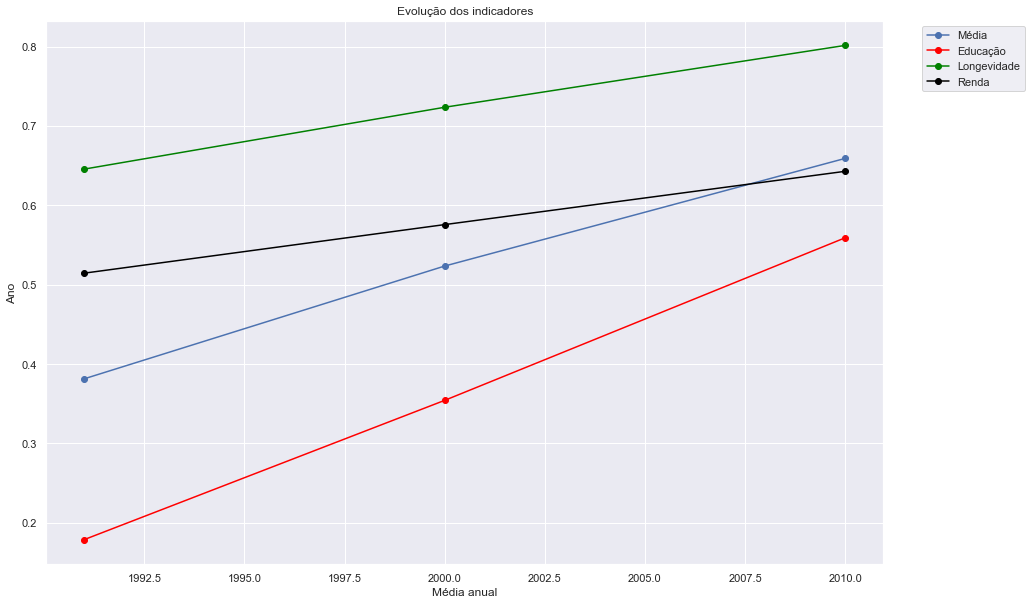

In [38]:
fig, (ax0) = plt.subplots(nrows = 1,
                            ncols = 1,
                            figsize = (15,10),
                             sharex = True)

scatter = ax0.plot(anos, 
                   lista_medias_municipio, 
                   marker='o', 
                   label='Média')


scatter = ax0.plot(anos,lista_medias_municipio_e, 
                   c = 'red', 
                   marker='o', 
                   label='Educação')

scatter = ax0.plot(anos, 
                   lista_medias_municipio_l,
                   c = 'green', 
                   marker='o', 
                   label='Longevidade')

scatter = ax0.plot(anos, 
                   lista_medias_municipio_r, 
                   c = 'black', 
                   marker='o', 
                   label='Renda')

ax0.set(title = 'Evolução dos indicadores',
        xlabel = 'Média anual',
       ylabel = 'Ano')

ax0.legend(bbox_to_anchor = (1.04,1))


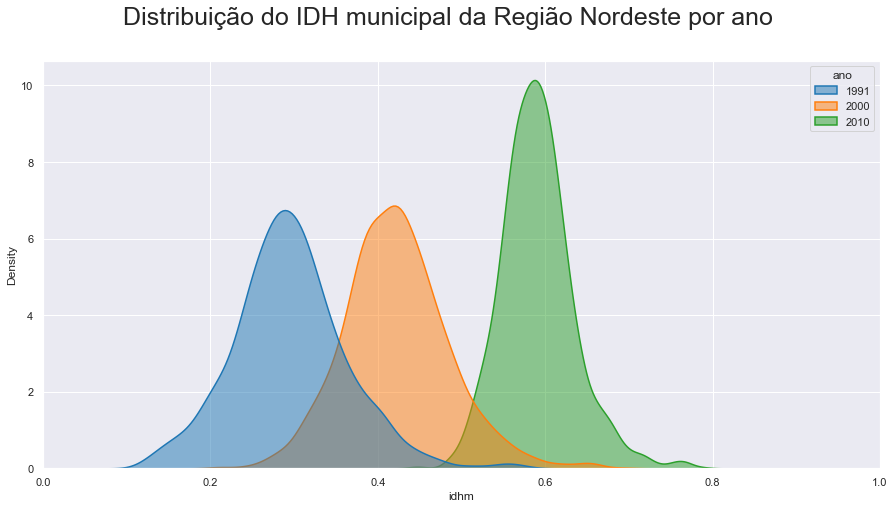

In [39]:
sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(figsize = (15,7.5))

ax = sns.kdeplot(data = df_total_municipios.loc[df_total_municipios["regiao"]=="Nordeste"], 
                  x= "idhm",
                  hue = 'ano',
                  palette = "tab10",
                  fill = True, 
                  common_norm = False, 
                  alpha = .5, 
                  linewidth = 1.5)

ax.set_xlim(0, 1)

fig.suptitle('Distribuição do IDH municipal da Região Nordeste por ano', fontsize=25)


plt.savefig("./Imagens/dist_idhm_regiao_nordeste.png")




# Gráfico 1 - IDHMe interativo por região 

In [40]:


def f(regiao):
  
    sns.set_theme(style="darkgrid")

    fig, ax = plt.subplots(figsize = (15,7.5))

    ax = sns.kdeplot(data = df_total_municipios.loc[df_total_municipios["regiao"]==regiao], 
                    x= "idhm_e",
                    hue = 'ano',
                    palette = "tab10",
                    fill = True, 
                    common_norm = False, 
                    alpha = .5, 
                    linewidth = 1.5)
    
    fig.suptitle('Distribuição do IDH municipal educacional por ano da Região {}'.format(regiao), fontsize=22)

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 12)

    plt.savefig("./Imagens/idhme_{}.png".format(regiao), dpi=400)

    plt.show()
    
interact(f, regiao = df_total_municipios["regiao"].unique())

interactive(children=(Dropdown(description='regiao', options=('Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-O…

<function __main__.f(regiao)>

In [41]:
df_total_municipios

,id_municipio,ano,idhm,idhm_e,idhm_l,idhm_r,municipio,capital_uf,uf,regiao,microrregiao,mesorregiao
0,1100015,1991,0.329,0.112,0.617,0.516,Alta Floresta D'Oeste,0,Rondônia,Norte,Cacoal,Leste Rondoniense
1,1100015,2000,0.483,0.262,0.698,0.617,Alta Floresta D'Oeste,0,Rondônia,Norte,Cacoal,Leste Rondoniense
2,1100015,2010,0.641,0.526,0.763,0.657,Alta Floresta D'Oeste,0,Rondônia,Norte,Cacoal,Leste Rondoniense
3,1100023,1991,0.432,0.199,0.684,0.593,Ariquemes,0,Rondônia,Norte,Ariquemes,Leste Rondoniense
4,1100023,2000,0.556,0.343,0.742,0.674,Ariquemes,0,Rondônia,Norte,Ariquemes,Leste Rondoniense
...,...,...,...,...,...,...,...,...,...,...,...,...
16690,5222302,2000,0.437,0.211,0.733,0.539,Vila Propício,0,Goiás,Centro-Oeste,Entorno de Brasília,Leste Goiano
16691,5222302,2010,0.634,0.505,0.802,0.629,Vila Propício,0,Goiás,Centro-Oeste,Entorno de Brasília,Leste Goiano
16692,5300108,1991,0.616,0.419,0.731,0.762,Brasília,1,Distrito Federal,Centro-Oeste,Brasília,Distrito Federal
16693,5300108,2000,0.725,0.582,0.814,0.805,Brasília,1,Distrito Federal,Centro-Oeste,Brasília,Distrito Federal


In [42]:
# Fixar escala

def f(regiao):
  
    sns.set_theme(style="darkgrid")

    fig, ax = plt.subplots(figsize = (15,7.5))

    ax = sns.kdeplot(data = df_total_municipios.loc[df_total_municipios["regiao"]==regiao], 
                    x= "idhm",
                    hue = 'ano',
                    palette = "tab10",
                    fill = True, 
                    common_norm = False, 
                    alpha = .5, 
                    linewidth = 1.5)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 12)
    

    plt.show()
    
interact(f, regiao = df_total_municipios["regiao"].unique())

interactive(children=(Dropdown(description='regiao', options=('Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-O…

<function __main__.f(regiao)>

# Gráfico 2 - IDHMe por estado

In [43]:
def f(uf):
  
    sns.set_theme(style="darkgrid")

    fig, ax = plt.subplots(figsize = (15,7.5))

    ax = sns.kdeplot(data = df_total_municipios.loc[df_total_municipios["uf"]==uf], 
                    x= "idhm_e",
                    hue = 'ano',
                    palette = "tab10",
                    fill = True, 
                    common_norm = False, 
                    alpha = .5, 
                    linewidth = 1.5)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 15)
    

    plt.show()
    
interact(f, uf = df_total_municipios["uf"].unique())

interactive(children=(Dropdown(description='uf', options=('Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', '…

<function __main__.f(uf)>

In [44]:
def Graf_Interativo_Ano_Regiao(Ano):
    
    sns.set_theme(style="darkgrid")

    fig, (ax0, ax1, ax2, ax3) = plt.subplots( ncols = 1,
                                              nrows = 4,
                                              figsize = (15,22),
                                              sharex = True)

    ax0 = sns.kdeplot(  data = df_total_municipios.loc[df_total_municipios["ano"] == Ano], 
                        x = "idhm",
                        hue = 'regiao',
                        palette = "rocket",
                        fill = True, 
                        common_norm = False, 
                        alpha = .5, 
                        linewidth = 1.5,
                        ax = ax0)
    
    ax0.set_title('IDH Total',
                   fontsize = 18,
                   y = 1.03)
    
    ax1 = sns.kdeplot(  data = df_total_municipios.loc[df_total_municipios["ano"] == Ano], 
                        x = "idhm_e",
                        hue = 'regiao',
                        palette = "rocket",
                        fill = True, 
                        common_norm = False, 
                        alpha = .5, 
                        linewidth = 1.5,
                        ax = ax1)
    
    ax1.set_title('IDH Escolar',
                   fontsize = 18,
                   y = 1.03)
    
    ax2 = sns.kdeplot(  data = df_total_municipios.loc[df_total_municipios["ano"] == Ano], 
                        x = "idhm_l",
                        hue = 'regiao',
                        palette = "rocket",
                        fill = True, 
                        common_norm = False, 
                        alpha = .5, 
                        linewidth = 1.5,
                        ax = ax2)
    
    ax2.set_title('IDH Longevidade',
                   fontsize = 18,
                   y = 1.03)
    
    ax3 = sns.kdeplot(  data = df_total_municipios.loc[df_total_municipios["ano"] == Ano], 
                        x = "idhm_r",
                        hue = 'regiao',
                        palette = "rocket",
                        fill = True, 
                        common_norm = False, 
                        alpha = .5, 
                        linewidth = 1.5,
                        ax = ax3)
    
    ax3.set_title('IDH Renda',
                   fontsize = 18,
                   y = 1.03)
    

    fig.suptitle('Distribuição de IDH Municipal', 
                 fontsize = 25, 
                 fontweight = 'bold', 
                 y = 0.92)
    
    ax1.legend_ = None
    ax2.legend_ = None
    ax3.legend_ = None
    
    ax0.legend(labels = ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste'],
               title="Região",
               loc= 0, 
               fontsize='medium', 
               fancybox= True,
               bbox_to_anchor=(0.5, 0.8, 0.5, 0.5),
               edgecolor  = '#FFFFFF',
               title_fontsize = 'large')
    
    ax0.set_ylabel('Densidade', fontsize = 15, y = 0.5)
    ax1.set_ylabel('Densidade', fontsize = 15, y = 0.5)
    ax2.set_ylabel('Densidade', fontsize = 15, y = 0.5)
    ax3.set_ylabel('Densidade', fontsize = 15, y = 0.5)
    
    plt.xlabel('IDH', fontsize = 20, x = 0.5)
    
    ax0.set_xlim(0, 1)
    ax0.set_ylim(0, 15)

    plt.show();

interact(Graf_Interativo_Ano_Regiao, Ano = [1991,2000, 2010])

interactive(children=(Dropdown(description='Ano', options=(1991, 2000, 2010), value=1991), Output()), _dom_cla…

<function __main__.Graf_Interativo_Ano_Regiao(Ano)>

In [45]:
def Graf_Interativo_Meso(UF):
    
    sns.set_theme(style="darkgrid")
    
    fig, ax = plt.subplots(figsize = (15,7.5))
    
    ax = sns.kdeplot(data = df_total_municipios.loc[df_total_municipios['uf'] == UF], 
                     x = "idhm",
                     hue = 'mesorregiao',
                     palette = "rocket",
                     fill = True, 
                     common_norm = False, 
                     alpha = .5, 
                     linewidth = 1.5)
    
    ax.legend(labels = df_total_municipios.mesorregiao.loc[df_total_municipios['uf'] == UF].unique(),
               title="Mesorregião",
               loc= 0, 
               fontsize='medium', 
               fancybox= True,
               bbox_to_anchor=(0.5, 0.6, 0.5, 0.5),
               edgecolor  = '#FFFFFF',
               title_fontsize = 'x-large')
    
    ax.set_xlabel('IDH', 
                  fontsize = 15, 
                  y = 0.5,
                  fontweight = 'bold')
    
    ax.set_ylabel('Densidade', 
                  fontsize = 15, 
                  y = 0.5,
                  fontweight = 'bold')
    
    fig.suptitle('IDH das Mesorregiões', 
                 fontsize = 20, 
                 fontweight = 'bold',
                 y = 0.94)
        
    plt.show(); 
    
interact(Graf_Interativo_Meso,
         UF = df_total_municipios.uf.unique())

interactive(children=(Dropdown(description='UF', options=('Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', '…

<function __main__.Graf_Interativo_Meso(UF)>

In [46]:
despesas_educação = \
['Educação',
'Ensino Fundamental',
'Atenção Básica',
'Assistência à Criança e ao Adolescente',
'Educação Infantil',
'Educação de Jovens e Adultos',
'Educação Especial',
'Cultura',
'"Patrimônio Histórico, Artístico e Arqueológico"',
'Difusão Cultural',
'Ensino Superior',
'Ensino Médio',
'Ensino Profissional',
'Educação Básica',
'Ciência e Tecnologia',
'Desenvolvimento Tecnológico e Engenharia',
'Demais Subfunções Ciência e Tecnologia',
'Demais Subfunções Cultura']

In [47]:
despesas_educação

['Educação',
 'Ensino Fundamental',
 'Atenção Básica',
 'Assistência à Criança e ao Adolescente',
 'Educação Infantil',
 'Educação de Jovens e Adultos',
 'Educação Especial',
 'Cultura',
 '"Patrimônio Histórico, Artístico e Arqueológico"',
 'Difusão Cultural',
 'Ensino Superior',
 'Ensino Médio',
 'Ensino Profissional',
 'Educação Básica',
 'Ciência e Tecnologia',
 'Desenvolvimento Tecnológico e Engenharia',
 'Demais Subfunções Ciência e Tecnologia',
 'Demais Subfunções Cultura']

In [48]:
# df_despesas_full = get_data("br_tesouro_finbra.despesas_por_funcao")
# df_despesas = df_despesas_full[["id_municipio", "sigla_uf", "ano", "coluna", "conta", "valor"]].loc[(df_despesas_full["coluna"] == "Despesas Pagas") & (df_despesas_full["conta"].isin(despesas_educação))]

In [49]:
#SELECT DISTINCT conta FROM `basedosdados.br_tesouro_finbra.despesas_por_funcao`;

#SELECT DISTINCT coluna FROM `basedosdados.br_tesouro_finbra.despesas_por_funcao`;

#SELECT * FROM `basedosdados.br_tesouro_finbra.despesas_por_funcao` WHERE coluna='Despesas Liquidadas' LIMIT 100;

#SELECT id_municipio, populacao, conta, valor FROM `basedosdados.br_tesouro_finbra.despesas_por_funcao`;

#SELECT  id_municipio, sigla_uf, ano, coluna, conta, valor  FROM `basedosdados.br_tesouro_finbra.despesas_por_funcao` WHERE coluna='Despesas Empenhadas';

In [50]:
df_despesas

,id_municipio,sigla_uf,ano,coluna,conta,valor
0,1100015,RO,2019,Despesas Pagas,Atenção Básica,16711374.57
1,1100015,RO,2019,Despesas Pagas,Educação,19035814.40
2,1100015,RO,2019,Despesas Pagas,Ensino Fundamental,19035814.40
3,1100023,RO,2019,Despesas Pagas,Assistência à Criança e ao Adolescente,485594.57
4,1100023,RO,2019,Despesas Pagas,Atenção Básica,15434353.83
...,...,...,...,...,...,...
306525,5222302,GO,2014,Despesas Pagas,Assistência à Criança e ao Adolescente,133387.56
306526,5222302,GO,2014,Despesas Pagas,Atenção Básica,650714.23
306527,5222302,GO,2014,Despesas Pagas,Educação,5231177.75
306528,5222302,GO,2014,Despesas Pagas,Ensino Fundamental,5096698.77
